# 1. Exploratory Data Analysis - Fraud Data

This notebook performs a comprehensive exploratory data analysis (EDA) on the e-commerce fraud dataset. We use the modular functions defined in the `src/` directory for consistency and reusability.

In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.loading import load_fraud_data, load_ip_country_data
from src.data.cleaning import handle_missing_values, remove_duplicates, correct_data_types, validate_data
from src.visualization.eda import (
    plot_univariate,
    plot_bivariate,
    plot_class_distribution,
    plot_correlation_matrix,
    plot_fraud_by_country
)
from src.features.geolocation import merge_ip_country, analyze_fraud_by_country

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [12]:
# Load the datasets
fraud_df = load_fraud_data()
ip_country_df = load_ip_country_data()

print(f"Fraud Data Shape: {fraud_df.shape}")
print(f"IP-to-Country Data Shape: {ip_country_df.shape}")

fraud_df.head()

2025-12-27 18:41:04 - fraud_detection - INFO - Loading fraud data from C:\Users\Lenovo\Documents\dawir\Fraud-Detection\data\raw\Fraud_Data.csv
2025-12-27 18:41:04 - fraud_detection - INFO - Loaded 151112 records with 11 columns
2025-12-27 18:41:04 - fraud_detection - INFO - Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
2025-12-27 18:41:04 - fraud_detection - INFO - Loading IP-to-country data from C:\Users\Lenovo\Documents\dawir\Fraud-Detection\data\raw\IpAddress_to_Country.csv
2025-12-27 18:41:04 - fraud_detection - INFO - Loaded 138846 IP ranges
Fraud Data Shape: (151112, 11)
IP-to-Country Data Shape: (138846, 3)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## Data Cleaning and Validation

In [13]:
# Basic validation
if validate_data(fraud_df):
    print("Data validation passed.")
else:
    print("Data validation failed!")

# Handle missing values (if any)
fraud_df = handle_missing_values(fraud_df, strategy='median')

# Remove duplicates
fraud_df = remove_duplicates(fraud_df)

# Correct data types
type_mapping = {
    'signup_time': 'datetime',
    'purchase_time': 'datetime'
}
fraud_df = correct_data_types(fraud_df, type_mapping)

fraud_df.info()

2025-12-27 18:41:05 - fraud_detection - INFO - All data validation checks passed
Data validation passed.
2025-12-27 18:41:05 - fraud_detection - INFO - No duplicate rows found
2025-12-27 18:41:05 - fraud_detection - INFO - Converted signup_time to datetime
2025-12-27 18:41:05 - fraud_detection - INFO - Converted purchase_time to datetime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age           

## Class Distribution

Visualizing the imbalance in the target variable (`class`).

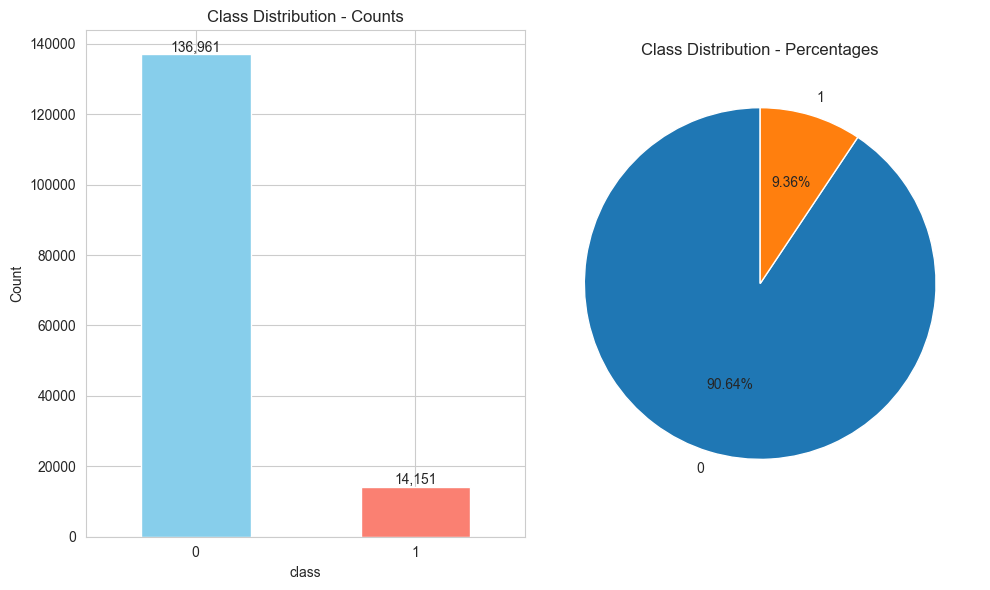

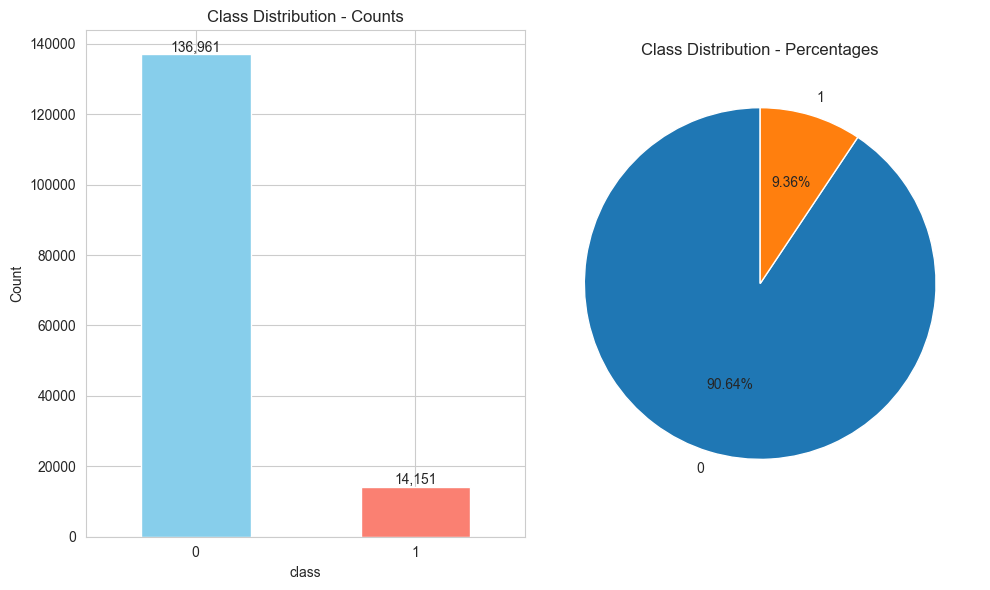

In [14]:
plot_class_distribution(fraud_df, col='class')

## Univariate Analysis

Exploring the distribution of individual features.

In [15]:
# Plot numeric distributions
plot_univariate(fraud_df, col='purchase_value', kind='hist')
plot_univariate(fraud_df, col='age', kind='hist')

TypeError: plot_univariate() got an unexpected keyword argument 'col'

In [ ]:
# Plot categorical distributions
plot_univariate(fraud_df, col='source', kind='count')
plot_univariate(fraud_df, col='browser', kind='count')
plot_univariate(fraud_df, col='sex', kind='count')

## Bivariate Analysis

Exploring relationships between features and the target variable.

In [ ]:
plot_bivariate(fraud_df, x='class', y='purchase_value', kind='box')
plot_bivariate(fraud_df, x='class', y='age', kind='box')

## Correlation Analysis

In [ ]:
plot_correlation_matrix(fraud_df)

## Geolocation Analysis

Merging with IP-to-Country data and analyzing geographic patterns.

In [ ]:
# Merge fraud data with country mapping
merged_df = merge_ip_country(fraud_df, ip_country_df)

print(f"Merged Data Shape: {merged_df.shape}")
merged_df.head()

In [ ]:
# Analyze fraud by country
country_stats = analyze_fraud_by_country(merged_df)

# Plot fraud distribution by country
plot_fraud_by_country(country_stats, top_n=15)

## Conclusion

The initial EDA provides insights into the dataset structure, missing values, and imbalances. We've established a baseline understanding of the features and their relationships with fraud. 

**Key Findings:**
- Significant class imbalance (fraud is rare).
- No immediate visual separation for purchase value or age between classes.
- Geolocation mapping reveals countries with higher fraud volumes and rates.